# Chaos and Bifurcation in the Sine Map

Joseph Godoy | Computational Physics | Project 02 | 2018

---

# Table of Contents
* [Plotting the sine map](#Plotting-the-Sine-Map)
* [Locating stable fixed points with Newton's method](#Locating-Stable-Fixed-Points)
* [Verifying stability with trajectory plots](#Checking-Stability-with-Trajectory-Plots)
* [Finding stable fixed points with Cobweb plots](#Computing-Stable-Fixed-Points-with-Cobweb-Plots)
* [The sine map's bifurcation diagram](##The-Sine-Map's-Bifurcation-Diagram)
* [Computing the Feigenbaum delta](#Computing-the-Sine-Map's-Feigenbaum-Delta)
* [Computing the Lyapunov exponent](#Computing-the-Sine-Map's-Lyapunov-Exponent)

---

**Background**

The sine map, much like the logistic map, is a mapping function used primarily for modelling populations. Given an initial state, $x_n$ and a scaling parameter $r$, we can use the sine map to predict the population $x_{n+1} = r \sin(\pi x_n)$ for a given time step $n$.
    
Like the logistic map, the sine map exhibits period doubling as our scaling parameter, $r$, increases in value -- more on this later. In this notebook, we make use of bifurcation diagrams, cobweb plots, and trajectories to better understand the properties of this mapping, such as the stable fixed points that $x$ will converge to at a given $r$, the Feigenbaum delta $\delta$, and the Lyapunov exponent, $\lambda$, both of which characterize the chaos of a system's behavior.

---

In [81]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
from scipy.optimize import newton
from scipy.optimize import curve_fit
import scipy.fftpack
from sympy import *
import matplotlib.pyplot as plt
import tqdm
import math
import seaborn
seaborn.set();
%matplotlib inline
font = {'family': 'serif','color':  'black', 'weight': 'normal','size': 16,}

In [82]:
feigenbaum_delta = lambda r_n_minus_one, r_n, r_n_plus_one : (r_n - r_n_minus_one) / (r_n_plus_one - r_n)
linefunc = lambda x,m,b : m*x + b
sine_map = lambda r, x_n : r * np.sin(np.pi*x_n)
logistic_map = lambda r, x_n : 4 * r * x_n * (1 - x_n)     

def logistic_plot(N, x_0, r):
    xn_all = []              
    xn_all.append(x_0) 
    n_all = []
    n_all.append(0)
    n = 0
    while n < N:
        xn = xn_all[n]
        x_nplusone = logistic_map(xn, r)
        xn_all.append(x_nplusone)
        n_all.append(n+1)   
        n = n + 1
    plt.figure()
    plt.title("Trajectory", fontdict = font)
    plt.plot(n_all,xn_all,"r", label="x_0 = %.2f, r = %.2f" % (x_0, r))
    plt.ylim(0,1)
    plt.xlabel("n", fontdict = font)
    plt.ylabel("x_{n+1}", fontdict = font)
    plt.legend(loc="upper right")
    plt.show()

def sine_plot(N, x_0, r):
    xn_all = [] 
    xn_all.append(x_0) 
    n_all = []
    n_all.append(0)
    n = 0
    while n < N:
        xn = xn_all[n]
        x_nplusone = sine_map(xn, r) 
        xn_all.append(x_nplusone)
        n_all.append(n+1)   
        n = n + 1 
    plt.title("Trajectory of x_n")
    plt.plot(n_all,xn_all,"r", label="x_0 = %.2f, r = %.2f" % (x_0, r))
    plt.ylim(0,1)
    plt.xlabel("n")
    plt.ylabel("x_{n+1}")
    plt.legend(loc="upper right")

def trajectory(x_0, r, N):
    xn_all = [] 
    xn_all.append(x_0) 
    n_all = []
    n_all.append(0)
    n = 0 
    while n < N:
        xn = xn_all[n]
        x_nplusone = sine_map(r,xn)
        xn_all.append(x_nplusone)
        n_all.append(n+1)
        n = n + 1
    
    return xn_all    
    
def traj_end(x0=0, r=0, Ntotal=1000, Nlast=100):
    xn_end = [] 
    xn = x0
    n = 0 
    while n < Ntotal:
        x_npo = sine_map(r, xn)
        if n > Ntotal-Nlast-1:
            xn_end.append(x_npo)
        xn = x_npo
        n = n + 1

    return xn_end    
    
## This function generates the bifurcation diagram. No need to pass it any arguments, just call it.
    
def plot_bifurcation(x0=0.5, Ntotal = 1000, Nend = 100, rmin = 0.6, rmax = 1, ymin = 0,ymax = 1, plotattractors=False):
    xoffset = 0.02
    plt.figure(figsize = (10,5))
    plt.title("Sine Map's Bifurcation Diagram", fontdict = font)
    for r in np.linspace(rmin,rmax,1000):
        xn=traj_end(x0,r,Ntotal,Nend)
        rh = r*np.ones(Nend)
        plt.plot(rh,xn,"b,")
    if(plotattractors):
        for i in range(0,len(attractors)):
            print("r_%d: %.3f" % (i+1,attractors[i]))
            plt.axvline(x=attractors[i])
            if(i<3):
                plt.text(attractors[i]-xoffset, xoffset, "r_%d" % (i+1))
            else:
                plt.text(attractors[i]+0.5*xoffset, xoffset, "r_%d" % (i+1))                
    plt.xlabel("$r$ value", fontdict = font)
    plt.ylabel("Stable Fixed Point $x_n$", fontdict = font)
    plt.ylim(ymin, ymax)
    plt.show()   

In [83]:
r = 0.6
zero_to_one = np.linspace(0,1,100)

# Plotting the Sine Map

When plotted, the sine map resembles a logistic map with a narrower peak.

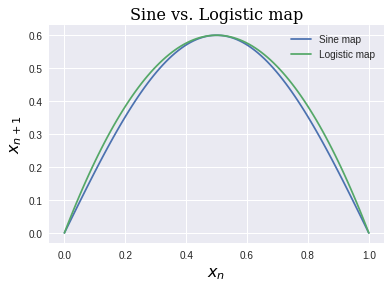

In [95]:
plt.figure()
plt.plot(zero_to_one,sine_map(r,zero_to_one), label='Sine map')
plt.plot(zero_to_one,logistic_map(r,zero_to_one), label='Logistic map')
plt.title("Sine vs. Logistic map", fontdict = font)
plt.xlabel('$x_n$', fontdict = font)
plt.ylabel('$x_{n+1}$', fontdict = font)
plt.legend()
plt.show()

Text(0,0.5,'$x_{n+1}$')

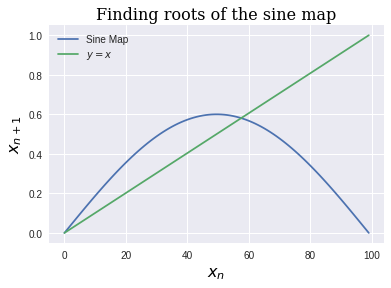

In [94]:
xn = np.linspace(0,1,100)
xmap = lambda xn: r * np.sin(np.pi*xn)
xmap1 = lambda xn: xn
xmap3 = lambda xn: r * np.sin(np.pi*xn) - xn
xmap4 = lambda xn: r * np.sin(r * np.sin(np.pi*xn)) - xn
xmap5 = lambda xn: r * np.sin(r * np.sin(np.pi*xn))
xmap10 = lambda xn: xmap(xmap(xmap(xmap(xmap(xmap(xmap(xmap(xmap(xmap(xn))))))))))

root, root2 = newton(xmap3,0.7), newton(xmap4,0.7)

current_x_value = 0.1 
line_length = np.inf
xn = np.linspace(0,1,100)
current_y_value = xmap(current_x_value)

xlist, ylist = [current_x_value],[current_y_value] 

## Loop to generate a cobweb plot:

index = 0
while line_length > 0.001:
    if index % 2 == 0:
        vertical = np.abs(xmap(current_x_value))
        delta = np.abs(xmap(current_x_value) - xmap1(current_x_value))
        current_y_value = vertical
        xlist.append(current_x_value)
        ylist.append(current_y_value)
        line_length = delta
    elif index % 2 != 0:
        horizontal = np.abs(xmap1(vertical)) 
        delta = np.abs(xmap(current_y_value) - xmap1(current_y_value))
        current_x_value = horizontal
        xlist.append(current_x_value)
        ylist.append(current_y_value)
        line_length = delta
    index += 1
    if index > 200:
        break

plt.plot(xmap(xn), label="Sine Map")
plt.plot(xmap1(xn), label="$y = x$")
plt.legend()
plt.title("Finding roots of the sine map", fontdict = font)
plt.xlabel("$x_n$", fontdict = font)
plt.ylabel("$x_{n+1}$", fontdict = font)

# Locating Stable Fixed Points

To find stable fixed points, we want to find $x^* = x_n = x_{n+1}$, or, the intersection between the sine map and the line $y = x$. For stable fixed points where there are bifurcations, we need to use higher order terms. In the period-2 case, our stable fixed points would be given by $x_n = f(x_n)$ and $x_{n+2} = f(f(x_n))$.

In the plot below, we use the Newton method to find the zero, where the difference $x_{n+1} - x_n = 0$.

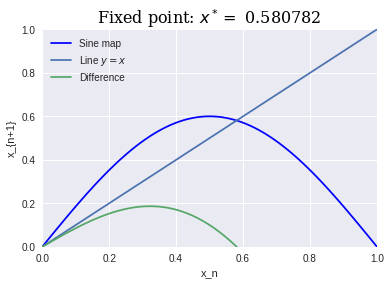

In [93]:
plt.figure()
plt.plot(xn,xmap(xn),"b-", label="Sine map",)
plt.plot(xn,xmap1(xn), label="Line $y=x$")
plt.plot(xn,xmap3(xn), label ="Difference")
plt.title("Fixed point: $x^* =$ %f" % root, fontdict = font)
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend(loc="upper left")
plt.show()

# Checking Stability with Trajectory Plots

To make sure this fixed point is stable, we need to make sure that $x_{n+1}$ converges to a *stable*, *fixed value* regardless of which $x_0$ value the system has.

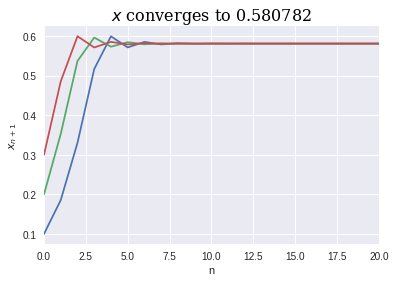

In [96]:
plt.plot(trajectory(0.1, r, 50))
plt.plot(trajectory(0.2, r, 50))
plt.plot(trajectory(0.3, r, 50))

plt.xlabel("n")
plt.ylabel("$x_{n+1}$")
plt.xlim(0,20)
plt.title("$x$ converges to %f" % root, fontdict = font)
plt.show()

# Computing Stable Fixed Points with Cobweb Plots

The *cobweb plot* is another numerical method to compute stable fixed points. To describe the cobweb plot as succinctly as possible, the red line (or, the *cobweb*) jumps from the map function to the line $y = x$ and vice versa until it encircles and converges on a stable fixed point. In the plot and computation below, we approximate the same stable fixed point (albeit with decreased accuracy) found by a previous cell via the Newton method.

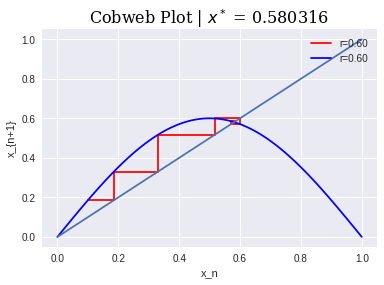

In [98]:
plt.figure()
plt.title("Cobweb Plot | $x^*$ = %f " % current_x_value, fontdict = font)
plt.plot(xlist,ylist,"r-", label="r=%.2f" % r)
plt.plot(xn,xmap(xn),"b-", label="r=%.2f" % r)
plt.plot(xn,xmap1(xn))
plt.xlabel("x_n")
plt.ylabel("x_{n+1}")
plt.legend(loc="upper right")
plt.show()

# The Sine Map's Bifurcation Diagram 

Bifurcation diagrams are useful for visualizing a map's stable fixed points as a function of the scaling parameter $r$. Like the logistic map, the system exhibits period doubling (in which the number of stable fixed points doubles) at critical $r_n$ values, where the number of stable fixed points is $2^n$.

Graphically, we can obtain the location of the first five period doublings:

$r_2 = 0.719$ , $r_4 = 0.833$, $r_8 =0.858$, $r_{16} = 0.864$, $r_{32} = 0.865$.

$r_{\infty}$ appears to be at $\approx$ 0.88, which is very close to the logistic map's 0.8924.


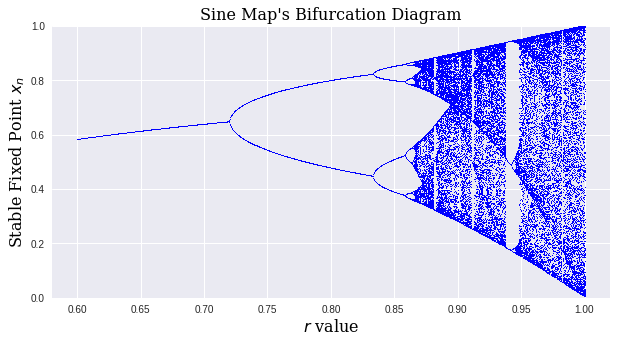

In [99]:
plot_bifurcation()

# Computing the Sine Map's Feigenbaum Delta

The Feigenbaum delta $\delta \equiv \dfrac{r_n - r_{n-1}}{r_{n+1} - r_{n}} $ is a useful tool to quantify the change in spacing between bifurcations. We find our map's Feigenbaum delta to be $4.5599$, which is close to the logistic map's $4.6692$.

In [68]:
r_values = {2:0.719,4:0.833,8:0.858,16:0.864,32:0.865}
print("Feigenbaum delta =", feigenbaum_delta(r_values[2],r_values[4],r_values[8]))

Feigenbaum delta = 4.559999999999995


# Computing the Sine Map's Lyapunov Exponent

The Lyapunov exponent, $\lambda$, is a useful tool to measure the sensitivity of a system to its initial conditions (i.e. exponential growth). If $\lambda<0$, then the system is predictable. If $\lambda>0$, the system is chaotic.

The Lyapunov exponent is defined as the exponent $\lambda$ on $\Delta x \approx c\epsilon e^{\lambda n}$
where $\epsilon = |x_{01}-x_{02}|$.

Lambda depends on the r-value; at $r = 0.9$, the sine map's Lyapunov exponent is $0.01492.$

At $r = 0.5$, the exponent is $-9.079 \cdot 10^{-6}$.

In [69]:
x0_1 = 0.4
x0_2 = x0_1+0.001
N    = 30
xn_1 = np.array(trajectory(x0_1, r, N))
xn_2 = np.array(trajectory(x0_2, r, N))
dx   = np.abs(xn_2-xn_1)
n    = np.linspace(0,N,N+1)
popt, pcov = curve_fit(linefunc, n, dx)
print("Lyapunov exponent at r = %f :" % r, popt[0])

Lyapunov exponent at r = 0.600000 : -1.1599343129420243e-05


---